# Python wrapper of REFPROP

Tutorial written by Ian Bell, NIST, 2018.  Want to contribute to it, or think this tutorial is missing an important topic?  Please make a note at https://github.com/usnistgov/REFPROP-wrappers/issues/new

## Help

If you have any problems with this wrapper, please open an issue at github: https://github.com/usnistgov/REFPROP-wrappers/issues/new

## Installation

The Python wrapper of REFPROP can be installed with

```
pip install ctREFPROP
```
More installation instructions are available at [REFPROP-wrappers](https://github.com/usnistgov/REFPROP-wrappers/tree/master/wrappers/python)

The wrapper is auto-generated to keep up-to-date with the FORTRAN code.  It is written in pure python with no dependencies aside from the standard library of Python

## Setup

*Windows normal users*: The Python wrapper of NIST REFPROP needs to be informed where its files are installed.  If you use the default installation location, and you have installed REFPROP with the MSI installer that you obtained from NIST, the ``RPPREFIX`` environment variable has been set, pointing to your installation, and you should not need to do anything with regards to setup.

*Superusers*: If, on the other hand, you have used the [REFPROP-cmake](https://github.com/usnistgov/REFPROP-cmake) build system to build REFPROP yourself (the recommended build system for custom builds), you will need to copy the ``FLUIDS`` and ``MIXTURES`` directories to the appropriate folder in which your .DLL/.so/.dylib is located.  The ``SETPATHdll`` function (see example below) informs REFPROP where it should be able to find the files that it needs.

In [2]:
# This path is suitable for the developer's computer (the developer has multiple 
# copies of REFPROP installed on their computer), but the default configuration 
# with the REFPROP installer on windows should not require this step
import os; os.environ['RPPREFIX'] = r'D:\REFPROP\\'

In [3]:
# Import the main class from the Python library
from ctREFPROP.ctREFPROP import REFPROPFunctionLibrary

# Imports from the standard library
import glob

# Imports from conda-installable packages
import pandas

## Use

In [4]:
# Now we instantiate the library, and use the environment variable to
# explicitly state which path we want to use. It was decided to make
# the path handling explicit (though more verbose), because explicit 
# is almost always better than implicit
RP = REFPROPFunctionLibrary(os.environ['RPPREFIX'])

# Now we tell REFPROP what the root directory is that it should use.  This root directory should contain, at least:
# A) REFPRP64.DLL (or REFPROP.dll for 32-bit windows, or librefprop.so or librefprop.dylib, for linux or OSX respectively)
# B) FLUIDS folder (case sensitive)
# C) MIXTURES folder (case sensitive)
RP.SETPATHdll(os.environ['RPPREFIX'])

# Get the unit system we want to use (we will revisit this GETENUM function later)
MOLAR_BASE_SI = RP.GETENUMdll(0, "MOLAR BASE SI").iEnum

In [5]:
# The classical first example, calculating the boiling temperature of water
# at one atmosphere (101325 Pa) in K
p_Pa = 101325
Q = 0.0
r = RP.REFPROPdll("Water","PQ","T",MOLAR_BASE_SI,0,0,p_Pa,Q,[1.0])
r.Output[0]

373.1242958476953

In [6]:
# You may also pass an absolute path to the .FLD file if you would like, which 
# supercedes the path specified to SETPATHdll
p_Pa = 101325
Q = 0.0
r = RP.REFPROPdll(os.path.join(os.environ['RPPREFIX'],"FLUIDS","WATER.FLD"),"PQ","T",MOLAR_BASE_SI,0,0,p_Pa,Q,[1.0])
r.Output[0]

373.1242958476953

In [7]:
# In each call to REFPROP, a named collections.namedtuple is returned, let's see what 
# we got from the last call
r

REFPROPdlloutput(z=array('d', [1.0]), Output=array('d', [373.1242958476953, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, -9999990.0, 

In [8]:
# We can access fields by name
r.ierr

0

In [9]:
# Or by value (here, the units string, accessed by index and by attribute)
r[2], r.hUnits

('K', 'K')

In [10]:
# You should always check the ierr code; ierr > 100 are fatal errors
# See also http://refprop-docs.readthedocs.io/en/latest/DLL/high_level.html#f/_/ERRMSGdll
assert r.ierr < 100

## Unit sytems

REFPROP supports a variety of unit systems (see [the docs](http://refprop-docs.readthedocs.io/en/latest/DLL/high_level.html#f/_/REFPROPdll)).  Though your calculations should only ever be done in SI-derived units (and preferably in base SI units (Pa, J, kg, mol)), you can also use other unit systems in REFPROP.  See the docs for more information on the use of IP units.  You can retrieve the enumerated values for the unit system (used in the ``REFPROPdll`` function, and in other functions in the high-level API) from the ``GETENUMdll`` function.  All the examples here use 
the molar base SI unit system.

In [11]:
for unit_string in 'DEFAULT','SI','MOLAR BASE SI':
    print(RP.GETENUMdll(0, unit_string).iEnum)

0
2
20


## Inputs/Outputs

In [12]:
# You can get multiple outputs from the REFPROP function, for instance here we get 
# the molar enthalpy, molar entropy, molar Gibbs energy, the gas constant, the 
# molar mass, and the speed of sound
# 
# Additional properties are listed in the documentation
#
# N.B. The enthalpy, entropy, and Gibbs energies obtained are a function of the reference 
# state selected
RP.REFPROPdll("R134A","PQ","H;S;G;R;M;W",MOLAR_BASE_SI,0,0,101325,0,[1.0]+[0.0]*19).Output[0:6]

array('d', [16917.95693422109, 88.67082187819224, -4990.492643521256, 8.3144598, 0.102032, 741.9687943699098])

## Retrieving Fluid Information

In [13]:
z = [1.0] + [0.0]*19
MOLAR_SI = RP.GETENUMdll(0,"MOLAR SI").iEnum

# Print out a range of properties for a well-known fluid
f = 'Propane'
print('Numerical outputs, stored in Output')
print('-----------------------------------')
for k in ["TC","PC","DC","TTRP","PTRP","MM","ACF",
          "DIPOLE","TNBP","REOS","ODP","GWP","TMIN",
          "TMAX","PMAX","HEATCOMB","HFRM"]:
    r = RP.REFPROPdll(f,"",k,MOLAR_SI,0,0,0,0,z)
    print(k + ' [' + r.hUnits+']:', r.Output[0], r.herr)

print('\nString Outputs, stored in hUnits')
print('--------------------------------')
for k in ["ALTID","CAS#","CHEMFORM","FULLCHEMFORM","SYNONYM",
          "FAMILY","HASH","INCHI","INCHIKEY","LONGNAME",
          "SAFETY","NAME","UNNUMBER","DOI_EOS(1)" ,
          "WEB_EOS(1)","REFSTATE","FLDNAME","FDIR(1)"]:
    r = RP.REFPROPdll(f,"",k,MOLAR_SI,0,0,0,0,z)
    print(k + ':', r.hUnits)

Numerical outputs, stored in Output
-----------------------------------
TC [K]: 369.89 
PC [MPa]: 4.2512 
DC [mol/dm^3]: 5.0 
TTRP [K]: 85.525 
PTRP [MPa]: 1.72e-10 
MM [g/mol]: 44.09562 
ACF [-]: 0.1521 
DIPOLE [debye]: 0.084 
TNBP [K]: 231.036 
REOS [(J/mol)/K]: 8.3144598 
ODP [-]: -1.0 
GWP [-]: 3.3 
TMIN [K]: 85.525 
TMAX [K]: 650.0 
PMAX [MPa]: 1000.0 
HEATCOMB [J/mol]: 2219170.0 
HFRM [J/mol]: -104683.0 

String Outputs, stored in hUnits
--------------------------------
ALTID: Not available
CAS#: 74-98-6
CHEMFORM: C3H8
FULLCHEMFORM: CH3CH2CH3
SYNONYM: R-290
FAMILY: n-alkane
HASH: 70c6aac0
INCHI: 1S/C3H8/c1-3-2/h3H2,1-2H3
INCHIKEY: ATUOYWHBWRKTHZ-UHFFFAOYSA-N
LONGNAME: Propane
SAFETY: A3
NAME: Propane
UNNUMBER: 1075, 1978
DOI_EOS(1): 10.1021/je900217v
WEB_EOS(1): 
REFSTATE: IIR
FLDNAME: Propane.FLD
FDIR(1): D:/REFPROP//fluids/Propane.FLD


In [15]:
# A slightly more involved example of obtaining information
# on the fluids in REFPROP, and storing it in a pandas 
# DataFrame for further sorting, grouping, etc.

# The search pattern for finding pure fluid files
FLUIDSglob = os.path.join(os.environ['RPPREFIX'],
                          'FLUIDS','*.FLD')
data = []
# Loop over the fluid files found
for fname in glob.glob(FLUIDSglob):
    # The fluid name is obtained as the string
    # to the right of the last path delimiter
    # and before the period.
    fld = os.path.split(fname)[1].split('.')[0]
    
    # Make a dictionary to collect information about
    # the fluid
    info = {'NAME':fld}
    # Numerical values w/ units
    for k in ['TC', 'PC', 'DC']:
        r = RP.REFPROPdll(fld," ",k,MOLAR_SI,0,0,0,0,z)
        heading = k + ' [' + r.hUnits + ']'
        info[heading] = r.Output[0]
        
    # String things
    for k in ['INCHIKEY','HASH']:
        r = RP.REFPROPdll(fld," ",k,MOLAR_SI,0,0,0,0,z)
        info[k] = r.hUnits
        
    # Store the dictionary in the list
    data.append(info)

# The complete DataFrame for all fluids; flatten the 
# list of dictionaries into a DataFrame
df = pandas.DataFrame(data)

# Print the first lines of the DataFrame as sorted by
# critical density in decreasing order
df.sort_values(by='DC [mol/dm^3]',ascending=False).head(5)

,DC [mol/dm^3],HASH,INCHIKEY,NAME,PC [MPa],TC [K]
78,24.100000,b912fce0,GKAOGPIIYCISHV-UHFFFAOYSA-N,NEON,2.66163,44.4000
146,17.873728,b43a7600,XLYOFNOQVPJJNP-UHFFFAOYSA-N,WATER,22.06400,647.0960
34,17.775550,3e131610,XLYOFNOQVPJJNP-ZSJDYOACSA-N,D2O,21.66180,643.8470
52,17.383700,3b8eed30,SWQJXJOGLNCZEY-UHFFFAOYSA-N,HELIUM,0.22832,5.1953
33,17.230000,639b18a0,UFHFLCQGNIYNRP-VVKOMZTBSA-N,D2,1.67960,38.3400


## Flash Calculations

One of the primary uses of REFPROP is to be able to calculate properties as a function of state variables other than temperature and density (the natural variables of the equation of state).  Therefore you need to be able to input other properties, and obtain the temperature and density, from which you can obtain all other thermodynamic properties explicitly.  

The following thermodynamic variables are allowed as inputs for the thermodynamic state: ``T``,``P``,``D``,``H``,``S``,``E``.  Two of them are required to fix the state.  In this example we calculate the density and vapor quality (on a molar basis) for the mixture of decane + nitrogen.

In [16]:
units = RP.GETENUMdll(0,'DEFAULT').iEnum
o = RP.REFPROPdll("Decane * Nitrogen","TP","D;Qmole",units,0,0,298,101.325,[0.4, 0.6])
assert(o.ierr == 0)
D_molL, Qmole = o.Output[0:2]

Now let's do something fun (and instructive) --  plot the isopleth (line of constant composition of the phase envelope) for this composition and show where our STP (standard temperature and pressure) state point is.

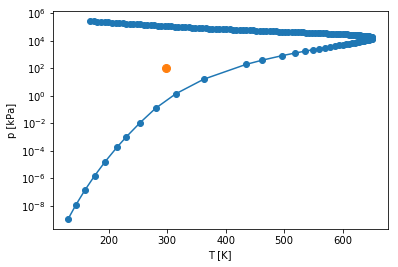

In [17]:
import matplotlib.pyplot as plt

# Obtain the isopleth data
# ---
# Set up the fluids we want
RP.SETFLUIDSdll('Decane * Nitrogen')
# Construct the saturation spline
RP.SATSPLNdll([0.4,0.6])
# Now we programatically extract the nodes of the isopleth...
Nnodes = RP.REFPROPdll("","SPLINENODES","",0,0,0,0,0,[0.4,0.6]).iUCode
data = []
for i in range(1,Nnodes+1):
    rho_vap,T,p,rho_eq,z0,z1 = RP.REFPROPdll("","SPLINENODES","",0,0,i,0,0,[0.4,0.6]).Output[0:6]
    data.append(dict(rho_vap = rho_vap,T=T,p=p,z0=z0,z1=z1))
# Convert the data points into a pandas DataFrame
df = pandas.DataFrame(data)
# And plot them...
plt.plot(df['T'],df.p,'o-')

# Plot the specified state point at STP
plt.plot(298, 101.325,'o-',ms=8)

plt.yscale('log')
plt.xlabel('T [K]')
plt.ylabel('p [kPa]')
plt.show()

This is a non-Type I mixture, therefore the "bubble" side of the phase enevelope continues up to high pressures.  This is common behavior for mixtures formed of asymmetric components.

## Speed!

In [20]:
# Set up REFPROP with Water as the fluid
MOLAR_BASE_SI = RP.GETENUMdll(0, "MOLAR BASE SI").iEnum
RP.SETFLUIDSdll("Water")

0

In [23]:
# The convenient REFPROP function introduces a significant amount of overhead
%timeit RP.REFPROPdll("","PQ","T",MOLAR_BASE_SI,0,0,1e5,0,[1.0])

90.5 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
# This is much faster because the overhead of the REFPROPdll function is avoided
%timeit RP.ABFLSHdll('PQ', 101.325, 0, [1.0], 0)

19.8 µs ± 75 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
